In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Customer Churn file .csv")

In [3]:
df['TotalCharges'] = df['TotalCharges'].replace(" " , "0")

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [6]:
def val( val ) :
    if val == 0 :
        return "YES"
    else : 
        return"NO"

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(val)

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,YES,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,YES,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,YES,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,YES,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,YES,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,YES,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,YES,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,YES,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,NO,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


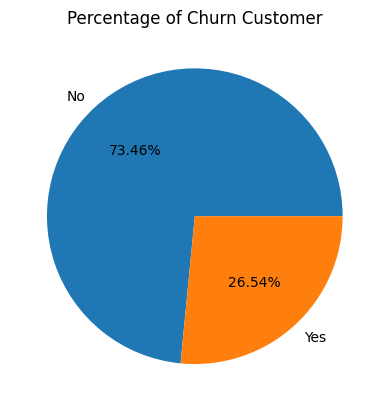

In [9]:
plt.pie(df.groupby("Churn").agg({"Churn":"count"})['Churn'] , labels=df.groupby("Churn").agg({"Churn":"count"}).index , autopct="%1.2f%%")
plt.title("Percentage of Churn Customer")
plt.show()

In [10]:
df.groupby("gender").agg({"gender" : "count"})['gender']

gender
Female    3488
Male      3555
Name: gender, dtype: int64

Finding Churn By gender

C:\Users\Samarth\AppData\Local\Temp\ipykernel_12444\2173246312.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  barplt = [ df.groupby("gender").agg({"gender" : "count"})['gender'][0] ,
C:\Users\Samarth\AppData\Local\Temp\ipykernel_12444\2173246312.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ccos.groupby("gender").agg({"Churn" : "count"})['Churn'][0] ,
C:\Users\Samarth\AppData\Local\Temp\ipykernel_12444\2173246312.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

<BarContainer object of 4 artists>

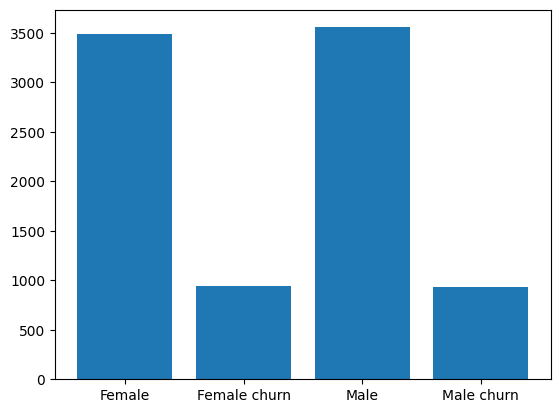

In [11]:
ccos = df[df['Churn'] == "Yes"]

x = [ "Female" , "Female churn" , "Male" , "Male churn" ]
barplt = [ df.groupby("gender").agg({"gender" : "count"})['gender'][0] ,
           ccos.groupby("gender").agg({"Churn" : "count"})['Churn'][0] ,
           df.groupby("gender").agg({"gender" : "count"})['gender'][1] ,
           ccos.groupby("gender").agg({"Churn" : "count"})['Churn'][1] ]
plt.bar( x , barplt )

Finding Churn by SeniorCitizen

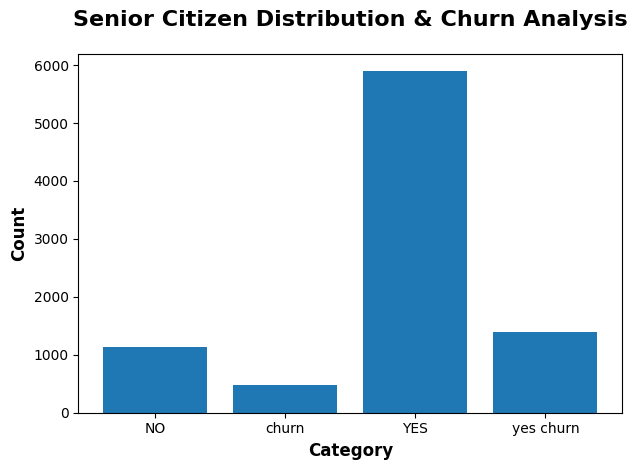

In [12]:
df.groupby("SeniorCitizen").agg({"SeniorCitizen" : "count"})['SeniorCitizen']

x = ["NO" ,"churn","YES","yes churn"]

scplat = [
    
    df.groupby("SeniorCitizen").agg({"SeniorCitizen" : "count"})['SeniorCitizen']["NO"] ,
    ccos.groupby("SeniorCitizen").agg({"SeniorCitizen" : "count"})['SeniorCitizen']["NO"] ,
    df.groupby("SeniorCitizen").agg({"SeniorCitizen" : "count"})['SeniorCitizen']["YES"] ,
    ccos.groupby("SeniorCitizen").agg({"SeniorCitizen" : "count"})['SeniorCitizen']["YES"]
    
    ]

plt.title('Senior Citizen Distribution & Churn Analysis', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.bar( x , scplat )
plt.show()

Churn tenure

C:\Users\Samarth\AppData\Local\Temp\ipykernel_12444\752623855.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


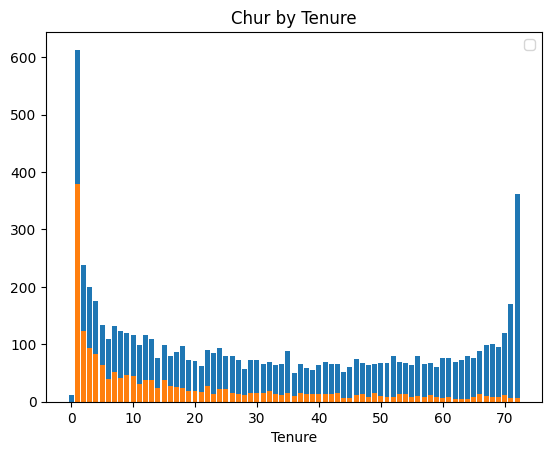

In [13]:
x = set(df["tenure"])
tx = tuple(x)
plt.bar( tx , df.groupby("tenure").agg({"tenure" : "count"})['tenure'] )
plt.bar( tuple(set(ccos["tenure"])) , ccos.groupby("tenure").agg({"Churn" : "count"})['Churn'] )
plt.xlabel("Tenure")
plt.title("Chur by Tenure")
plt.legend()
plt.show()

Churn by Contract

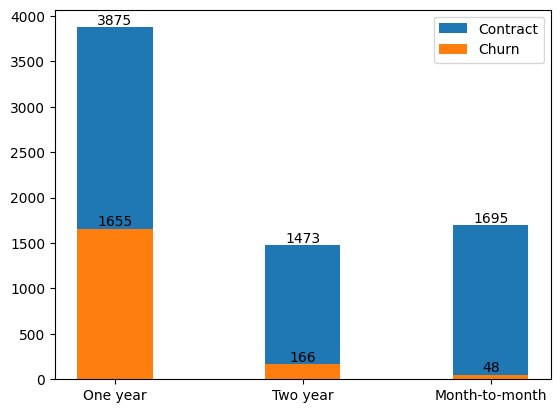

In [14]:
bar1 = plt.bar( tuple(set(df['Contract'])) , df.groupby("Contract").agg({"Contract" : "count"})['Contract'] , width=0.4)
bar2 = plt.bar( tuple(set(ccos['Contract'])) , ccos.groupby("Contract").agg({"Contract" : "count"})['Contract'] , width=0.4)

plt.bar_label(bar2)
plt.bar_label(bar1)

plt.legend(["Contract","Churn"])

plt.show()

In [15]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,YES,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,YES,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


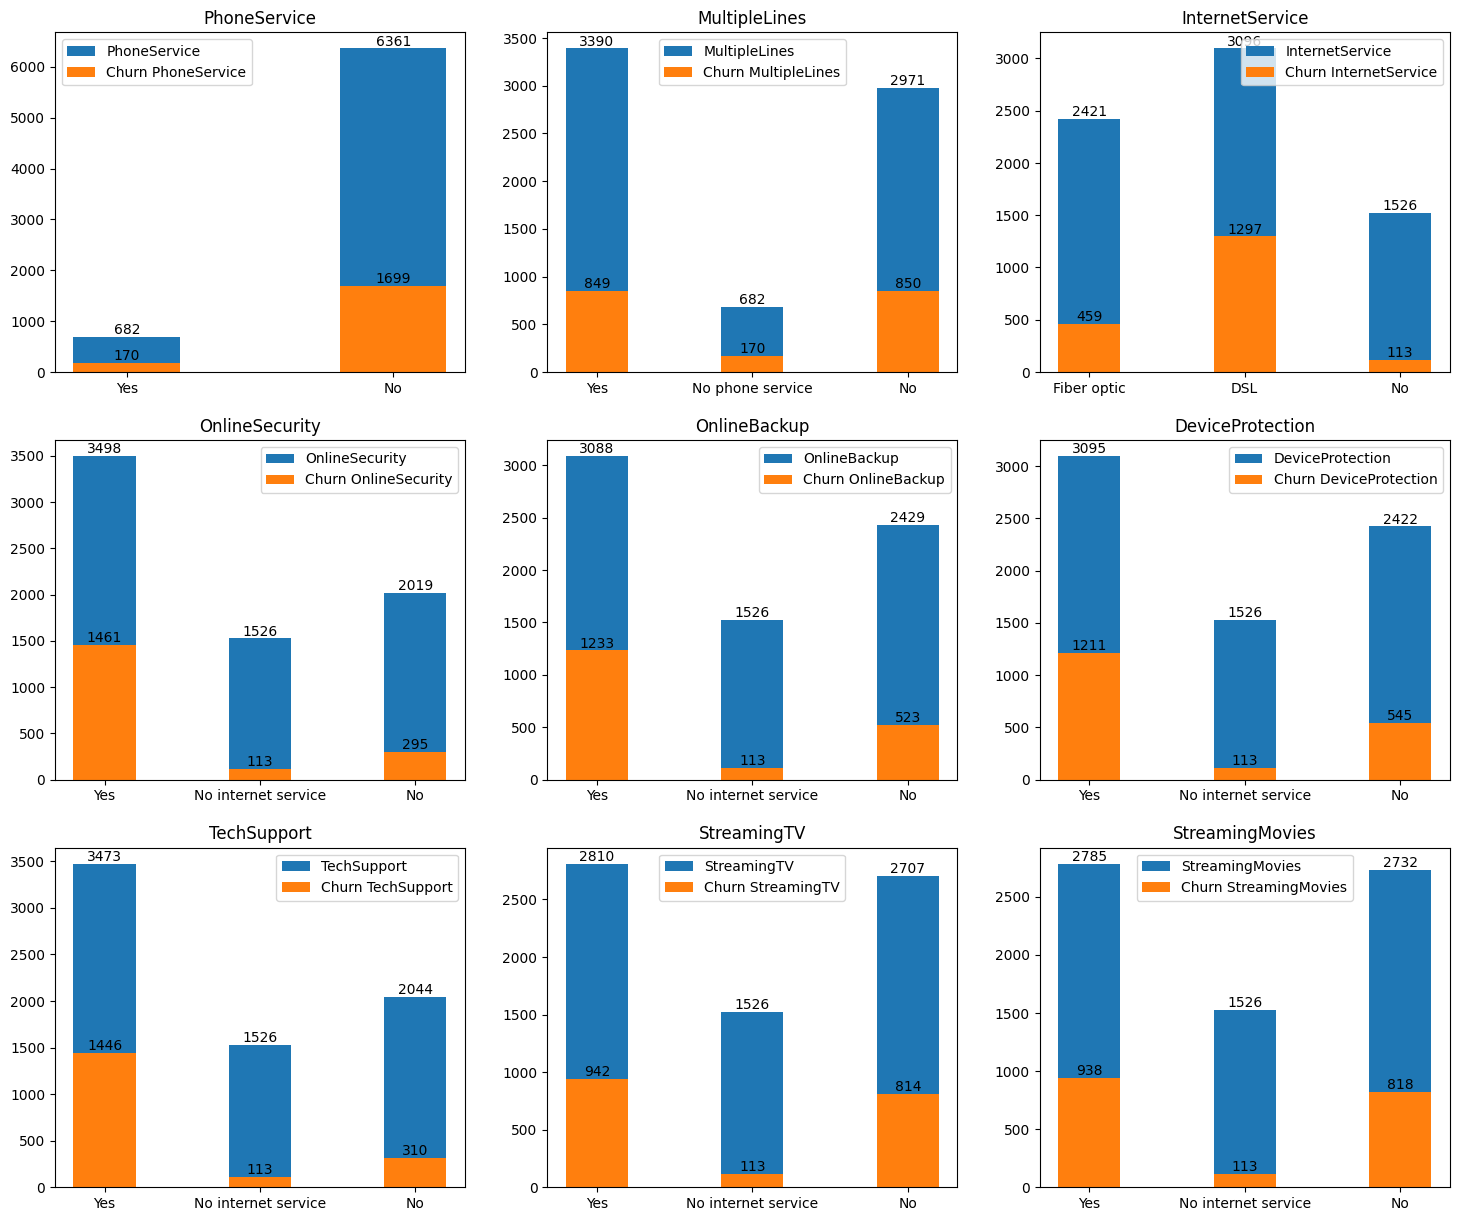

In [ ]:
fig , ax = plt.subplots(3,3,figsize=(18, 15))
indexone = 0
indextwo = 0
for i in ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'] :
    if indextwo == 3 :
        indextwo = 0
        indexone = indexone + 1
        # print( indexone , indextwo)
    
    print( indexone , indextwo)

    bar1 = ax[indexone,indextwo].bar(tuple(set(df[i])) , df.groupby(i).agg({i : "count"})[i] , width=0.4, label=i)
    bar2 = ax[indexone,indextwo].bar(tuple(set(ccos[i])) , ccos.groupby(i).agg({i : "count"})[i] , width=0.4, label=f"Churn {i}")
    ax[indexone,indextwo].bar_label(bar1)
    ax[indexone,indextwo].bar_label(bar2)
    ax[indexone,indextwo].set_title(i)
    ax[indexone,indextwo].legend()
    indextwo = indextwo + 1

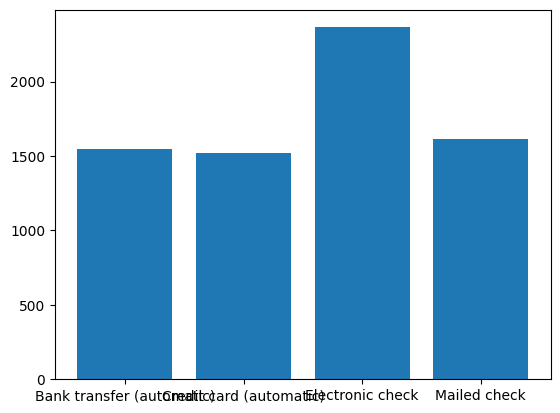

In [46]:
plt.bar(df.groupby(['PaymentMethod']).agg({"PaymentMethod" : "count"}).index,df.groupby(['PaymentMethod']).agg({"PaymentMethod" : "count"})['PaymentMethod'])
plt.show()

,MonthlyCharges
MonthlyCharges,
18.25,1
18.40,1
18.55,1
18.70,2
18.75,1
...,...
118.20,1
118.35,1
118.60,2
